In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
# Step 2: Load Dataset
# Replace with your file name or path (e.g., "spam.csv" from Kaggle)
df = pd.read_csv(r"C:\Users\comp\Desktop\kuki\vs code\lab3\lab-3\ML\emailspam2nd\emails.csv", encoding='latin-1')

# Display first few rows
df.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# Step 3: Separate features (X) and target (y)
# Drop 'Email No.' and 'Prediction' columns for X
X = df.drop(['Email No.', 'Prediction'], axis=1)

# Target column
y = df['Prediction']

print("\nFeature shape:", X.shape)
print("Target shape:", y.shape)
print("\nUnique labels in Prediction column:", y.unique())



Feature shape: (5172, 3000)
Target shape: (5172,)

Unique labels in Prediction column: [0 1]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


🔹 KNN Accuracy: 0.8724637681159421

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       735
           1       0.75      0.85      0.79       300

    accuracy                           0.87      1035
   macro avg       0.84      0.86      0.85      1035
weighted avg       0.88      0.87      0.87      1035



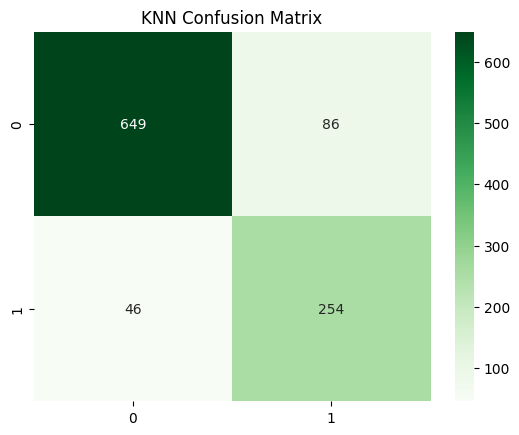

In [7]:
# Step 5: Train and Evaluate KNN (Fixed)

import numpy as np

# Ensure all features are numeric float values
X_train = np.array(X_train, dtype=float)
X_test  = np.array(X_test, dtype=float)

# Also ensure target is numeric
y_train = np.array(y_train, dtype=int)
y_test  = np.array(y_test, dtype=int)

# Fit KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Evaluate
print("🔹 KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens')
plt.title("KNN Confusion Matrix")
plt.show()


🔹 SVM Accuracy: 0.9671497584541063

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       735
           1       0.94      0.95      0.94       300

    accuracy                           0.97      1035
   macro avg       0.96      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



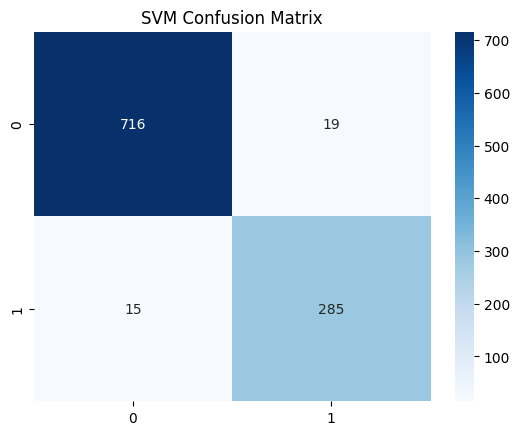

In [8]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("🔹 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


  Model  Accuracy
0   KNN  0.872464
1   SVM  0.967150


C:\Users\comp\AppData\Local\Temp\ipykernel_13232\8195022.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=comparison, palette="Set2")


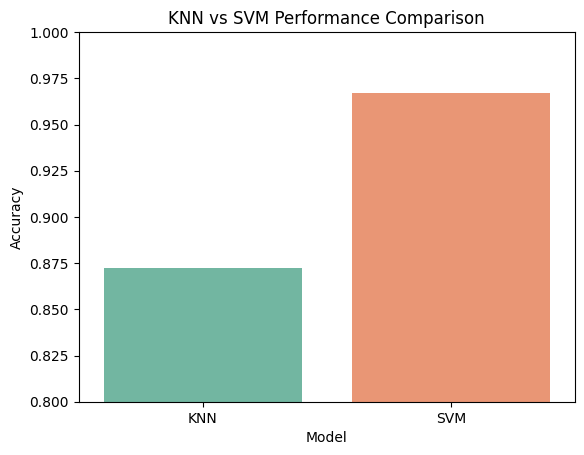

In [9]:
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svm = accuracy_score(y_test, y_pred_svm)

comparison = pd.DataFrame({
    "Model": ["KNN", "SVM"],
    "Accuracy": [acc_knn, acc_svm]
})

print(comparison)

sns.barplot(x="Model", y="Accuracy", data=comparison, palette="Set2")
plt.title("KNN vs SVM Performance Comparison")
plt.ylim(0.8, 1.0)
plt.show()


In [10]:
if acc_svm > acc_knn:
    print("✅ SVM performs better for email spam detection.")
else:
    print("✅ KNN performs better for email spam detection.")


✅ SVM performs better for email spam detection.
